# Exploring the CIFAR Neural Network

Use this notebook to run tests with your new cifar data network. Remember, you can add
```model.save('cifar_model.h5')```
to save and export your model.

In [1]:
!pip install tensorflow==2.16.1
import tensorflow as tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 24.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [2]:
tf.__version__

'2.16.1'

In [4]:
from keras.preprocessing import image
from PIL import Image,ImageChops
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load in the original data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = cifar10.load_data()

print("CIFAR10 data loaded")

label_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
train_labels_backup = [item for sublist in train_labels_backup for item in sublist]
test_labels_backup = [item for sublist in test_labels_backup for item in sublist]

# This will work for the models if you download them from the links in the repo.
model_1 = tf.keras.models.load_model('CIFAR_model.h5')
#model_2 = tf.keras.models.load_model('CIFAR_model.keras')

def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(" This is " + label_names[labels[i]])
  plt.xticks([])
  plt.yticks([])
  plt.show()

def predict_image(model, x):
  x = x.astype('float32')
  x = x / 255.0

  x = np.expand_dims(x, axis=0)

  image_predict = model.predict(x, verbose=0)
  print("Predicted Label: ", label_names[np.argmax(image_predict)])

  plt.imshow(np.squeeze(x))
  plt.xticks([])
  plt.yticks([])
  plt.show()

  # uncomment the line below if you want to see the array of predictions
  # print(image_predict)
  return image_predict


def plot_value_array(predictions_array, true_label, h):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
  plt.ylim([(-1*h), h])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  plt.show()


CIFAR10 data loaded


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Basic Testing

Predicted Label:  frog


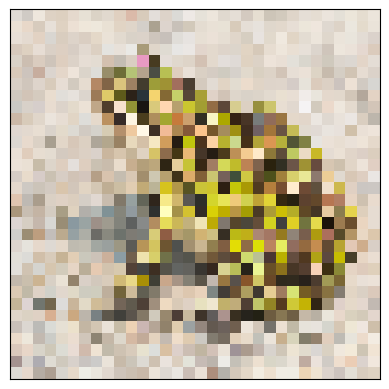

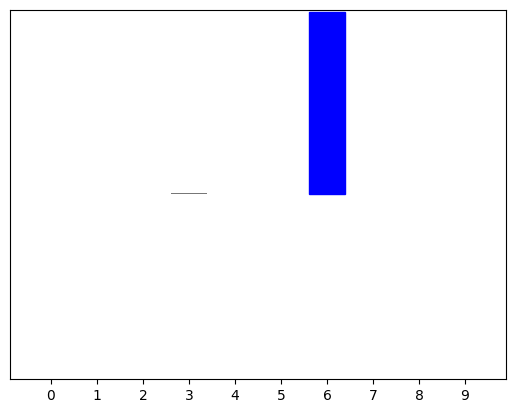

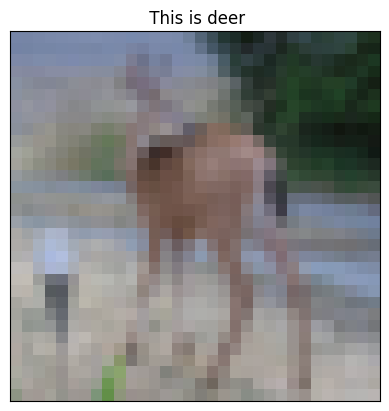

Predicted Label:  deer


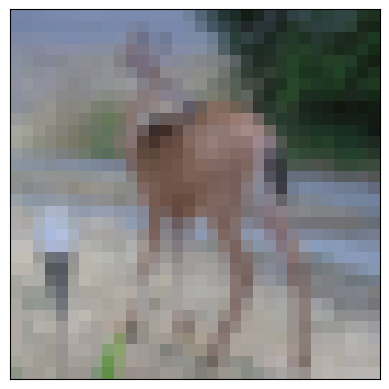

4


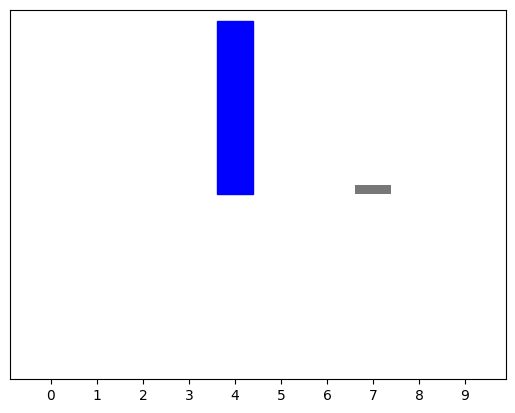

In [7]:
# Code to load a test image called 'testfrog.jpg'
# To use a different image upload it and change the name here.
path = "/content/testfrog.jpg"
img = image.load_img(path, target_size=(32,32), color_mode = "rgb")
x = image.img_to_array(img)
true_label = 6

## Predicting the label using model_1.
p_arr = predict_image(model_1, x)
# This will plot the values on a graph. The last argument is the height of the y-axis.
plot_value_array(p_arr, true_label, 1)

# Displaying the 100th image from the original dataset
plot_image(test_images, 100, test_labels_backup)

# Predicting the label using model_1 on an image from test_images
img_loc = 100
img = test_images[img_loc]
x = image.img_to_array(img)
p_arr = predict_image(model_1, x)
true_label = test_labels_backup[img_loc]
print(true_label)
plot_value_array(p_arr, true_label, 1)

# Create an array of random numbers from 0 to 255 of size (32, 32, 3)
x = np.random.randint(0, 255, (32, 32, 3) )


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test 1

Running a square image of a frog, or an airplane or any of the other classes through the network.

Predicted Label:  ship


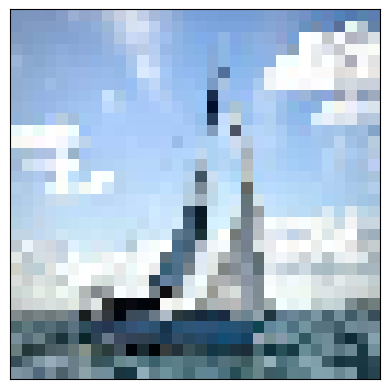

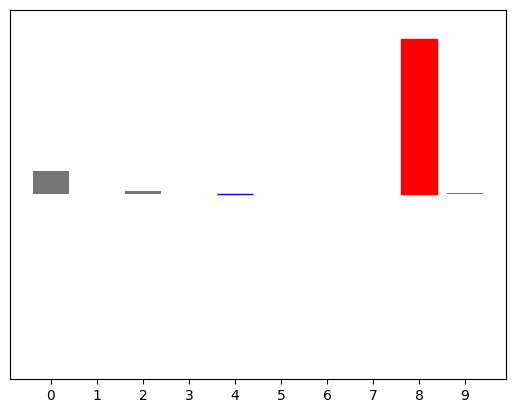

In [8]:
# Write code for test 1 here
path = "/content/ship_test_image.jpg"
img = image.load_img(path, target_size=(32,32), color_mode = "rgb")
x = image.img_to_array(img)
p_arr = predict_image(model_1, x)
plot_value_array(p_arr, true_label, 1)

# Test 2

Running a randomly generated image through the network to view any bias with what it predicts.

Predicted Label:  airplane


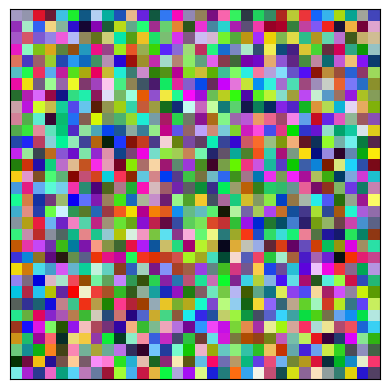

Predicted Label:  truck


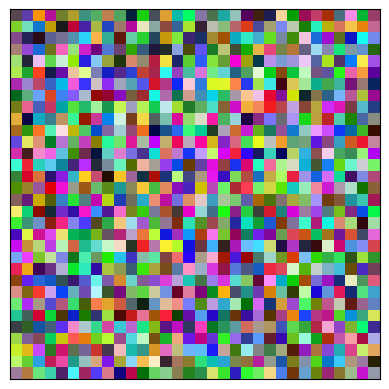

Predicted Label:  truck


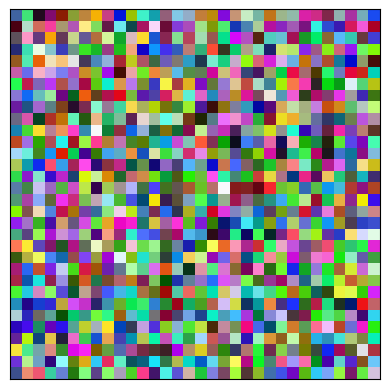

Predicted Label:  frog


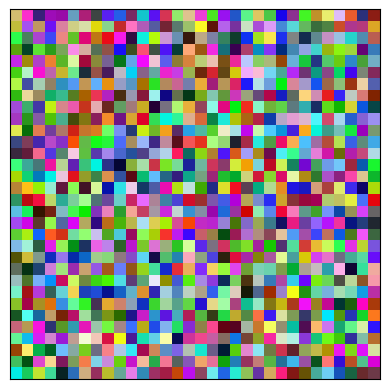

Predicted Label:  ship


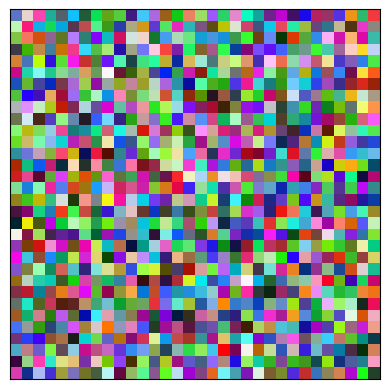

Predicted Label:  frog


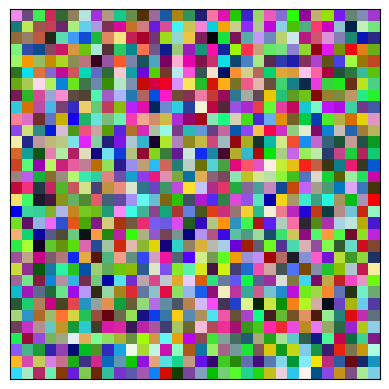

Predicted Label:  frog


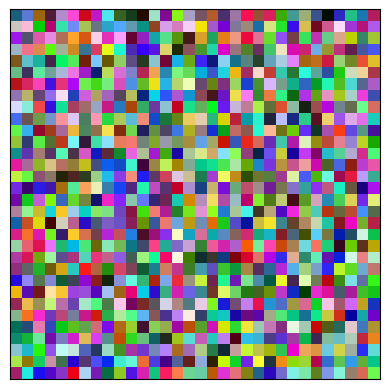

Predicted Label:  airplane


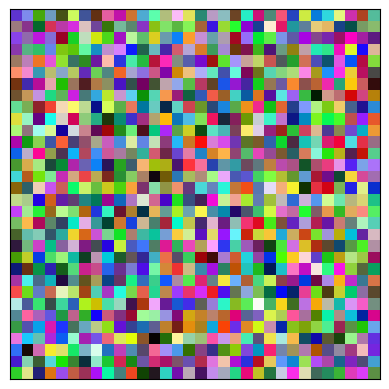

Predicted Label:  ship


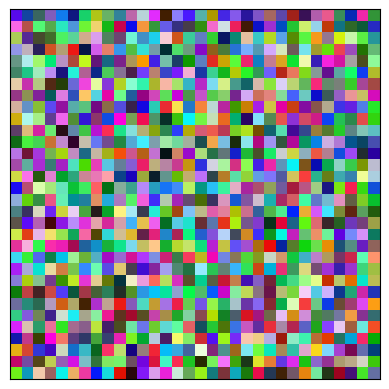

Predicted Label:  ship


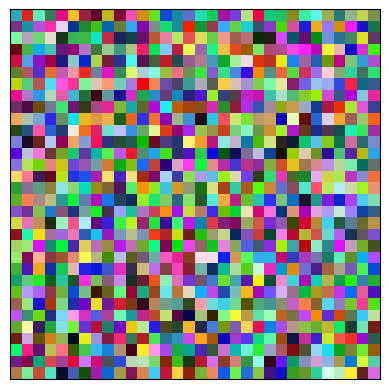

In [10]:
# Write code for test 2 here
for i in range(10):
  random_image = np.random.randint(0,255, (32,32,3))
  predict_image(model_1, random_image)

# Test 3

Testing the network with some random images from the test_images set.

Predicted Label:  dog


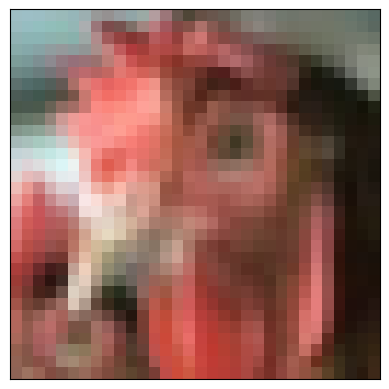

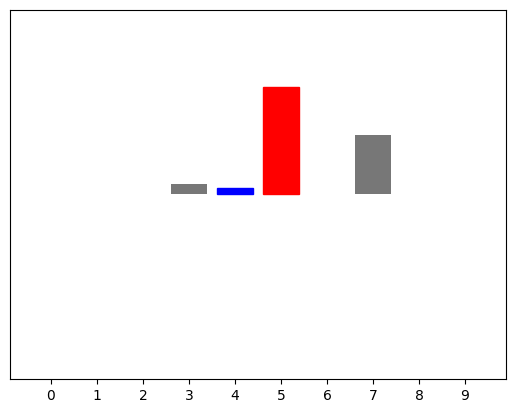

In [14]:
# Write code for test 3 here
import random
img_loc = random.randint(1,10000)
img = test_images[img_loc]
x = image.img_to_array(img)
p_arr = predict_image(model_1, x)
#not necessary
#true_label = test_labels_backup[img_loc]
#print(true_label)
plot_value_array(p_arr, true_label, 1)